In [ ]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
from bs4 import BeautifulSoup

In [66]:
language, tag_count = [], []

def extract_tagged(url):

  page = requests.get(url)
  html = page.content
  soup = BeautifulSoup(html,"html.parser")
  
  languages = soup.find_all("a",{"class":"post-tag"})
  for lang in languages:
    language.append(lang.text)

  counts = soup.find_all('div',{"class":"mt-auto d-flex jc-space-between fs-caption fc-black-400"})
  for count in counts:
    tag_count.append(count.find("div").text)




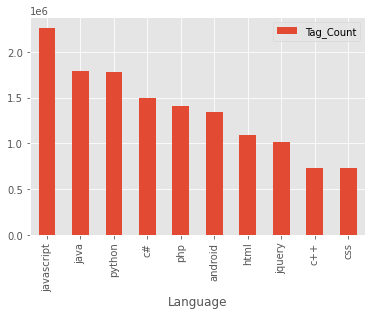

In [67]:
for i in range(1,3):
    extract_tagged("http://stackoverflow.com/tags?page="+str(i)+"&tab=popular")

  
#print(language)
#print(tag_count)
## remove word(' questions') from tag_count and convert them to integers
for i in range(len(tag_count)):
  tag_count[i] = int(tag_count[i][:-10])
#print(tag_count)


df= pd.DataFrame({
                  "Language": language,
                  "Tag_Count": tag_count
                })
df.to_csv("Tag_Count.csv")

style.use('ggplot')

df.sort_values(by=['Tag_Count'],ascending=False).head(10).set_index('Language').plot(kind='bar')
plt.show()